In [1]:
from google.colab import files
uploaded = files.upload()  # choose synthetic_pipeline.csv from your Mac


Saving synthetic_pipeline.csv to synthetic_pipeline.csv


{'Leads': 1000, 'Appt set %': np.float64(0.566), 'Show %': np.float64(0.452), 'Qualified %': np.float64(0.33), 'Proposal %': np.float64(0.221), 'Close %': np.float64(0.084)}
          leads  close_rate   revenue
source                               
Retail      454        0.08  123686.0
Inbound     195        0.11   74811.0
Outbound    161        0.06   36898.0
Referral    130        0.06   34004.0
Events       60        0.17   33499.0


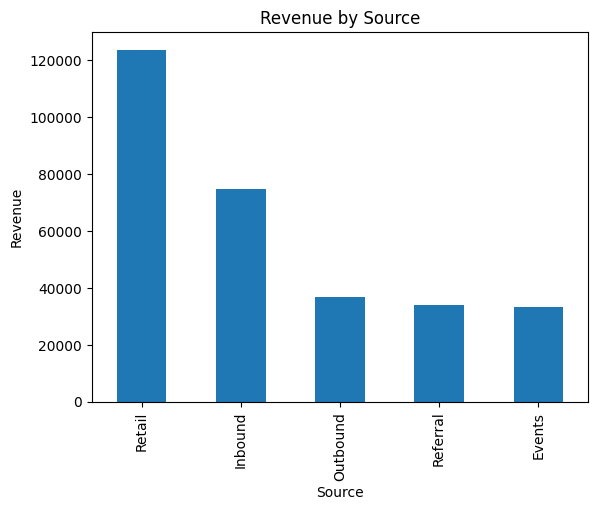

In [2]:
import pandas as pd, matplotlib.pyplot as plt

df = pd.read_csv("synthetic_pipeline.csv", parse_dates=["created_at"])

# funnel metrics
tot = len(df)
metrics = {
    "Leads": tot,
    "Appt set %": round(df["appt_set"].mean(), 3),
    "Show %": round(df["appt_show"].mean(), 3),
    "Qualified %": round(df["qualified"].mean(), 3),
    "Proposal %": round(df["proposal"].mean(), 3),
    "Close %": round(df["closed_won"].mean(), 3),
}
print(metrics)

# revenue by source (table)
source = df.groupby("source").agg(
    leads=("lead_id","count"),
    close_rate=("closed_won","mean"),
    revenue=("deal_size","sum")
).round(2).sort_values("revenue", ascending=False)
print(source)

# one chart
source["revenue"].plot(kind="bar", title="Revenue by Source")
plt.xlabel("Source"); plt.ylabel("Revenue"); plt.show()
